In [ ]:
pip install mysql-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import io
import base64
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve , confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import mysql.connector
from mysql.connector import errorcode
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/brain_stroke.csv')

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
object_cols = ['gender', 'ever_married','hypertension', 'heart_disease', 'Residence_type','work_type','smoking_status']

In [ ]:
cat_cols_object = data.select_dtypes(include ='object' or 'int64').keys()

In [ ]:
# 원핫 인코딩 으로 텍스트 데이터 처리
onehot_encoder = OneHotEncoder(sparse=False)
df_encoded = pd.DataFrame(
    onehot_encoder.fit_transform(data[cat_cols_object]),
    columns = onehot_encoder.get_feature_names_out(cat_cols_object)
)
df_encoded = pd.concat(
    [data.drop(columns = cat_cols_object), df_encoded],
    axis = 1
)
df_encoded.head()
y = data[['stroke']]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, random_state=42, test_size=0.25)

In [ ]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test= standard_scaler.fit_transform(X_test)

In [ ]:
cat_cols_object = data.select_dtypes(include ='object' or 'int64').keys()

Image Variable: 

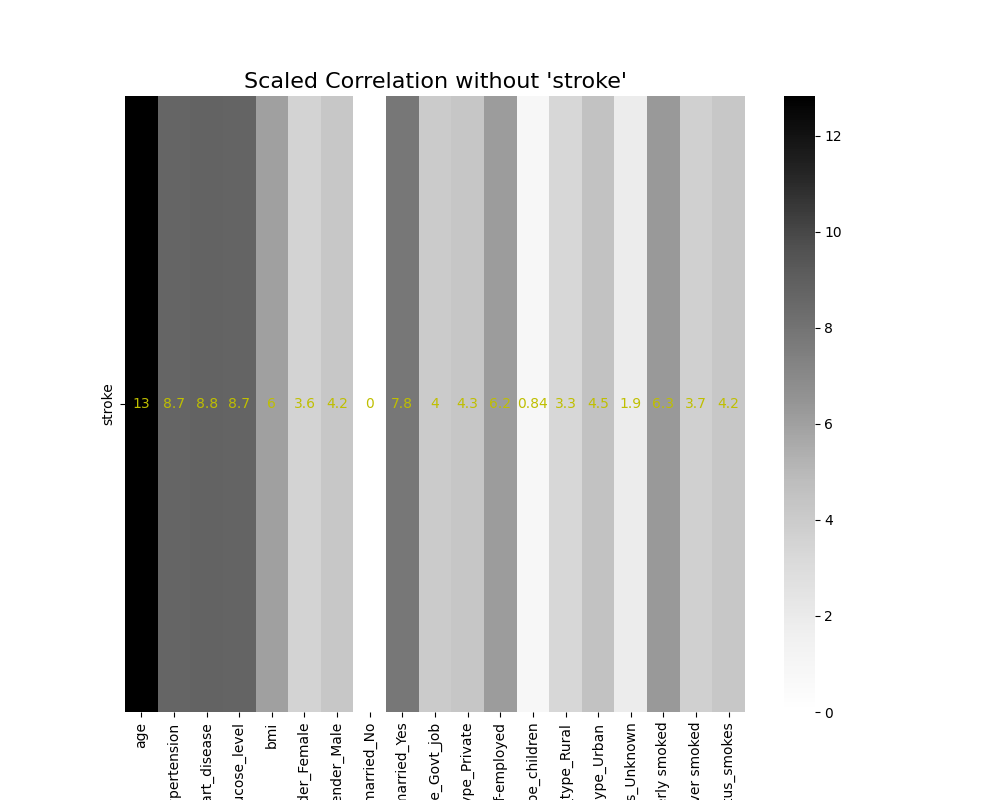

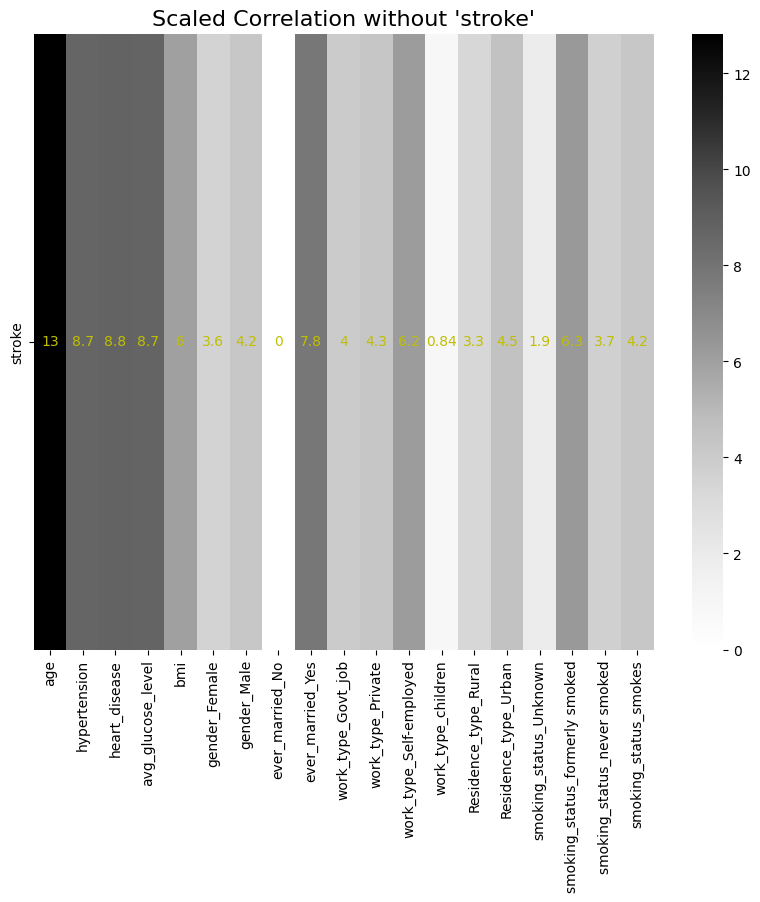

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import io
import base64
# 특성 열 선택
features = df_encoded
out = y
# Min-Max 스케일링 적용
scaler = standard_scaler
scaled_data = scaler.fit_transform(df_encoded)
# 스케일링된 데이터로 DataFrame 생성
scaled_df = pd.DataFrame(scaled_data, columns=df_encoded.columns)
scaled_df['stroke'] = out
# 상관관계 계산
correlation_matrix = scaled_df.corr()
# 'output' 열에 대한 상관관계 추출 (x에서 제외)
output_correlation = correlation_matrix.drop('stroke')['stroke']
# 상관관계 값을 0~1로 스케일링
scaled_output_correlation = (output_correlation - output_correlation.min()) / (output_correlation.max() - output_correlation.min())
# 합이 100이 되도록 조정
scaled_output_correlation = (scaled_output_correlation / scaled_output_correlation.sum()) * 100
# 상관관계 시각화
plt.figure(figsize=(10, 8))
ax = sns.heatmap(data=scaled_output_correlation.to_frame().T, annot=True, annot_kws=dict(color='y', fontsize=10), cmap='Greys')
plt.title("Scaled Correlation without 'stroke'", fontsize=16)
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)
# Base64로 인코딩
image_brain1 = base64.b64encode(buffer.getvalue()).decode('utf-8')
image_brain1 = "data:image/png;base64," + image_brain1
print(f"Image Variable: {image_brain1}")
plt.show()

In [ ]:
# 로지시틱 회귀 모델
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
y_pred_proba = logreg.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)

predicted_zeros = X_test[y_pred == 0]  # 0으로 예측한 데이터
predicted_ones = X_test[y_pred == 1]  # 1으로 예측한 데이터

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model.score(X_test, y_test)

1.0

In [ ]:
type(predicted_zeros)

numpy.ndarray

In [ ]:
# 테이블 열 저장
column_names = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'gender_Male', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes']
predicted_zeros = pd.DataFrame(predicted_zeros, columns=column_names)

In [ ]:
predicted_ones = pd.DataFrame(predicted_ones, columns=column_names)

Image Variable: 

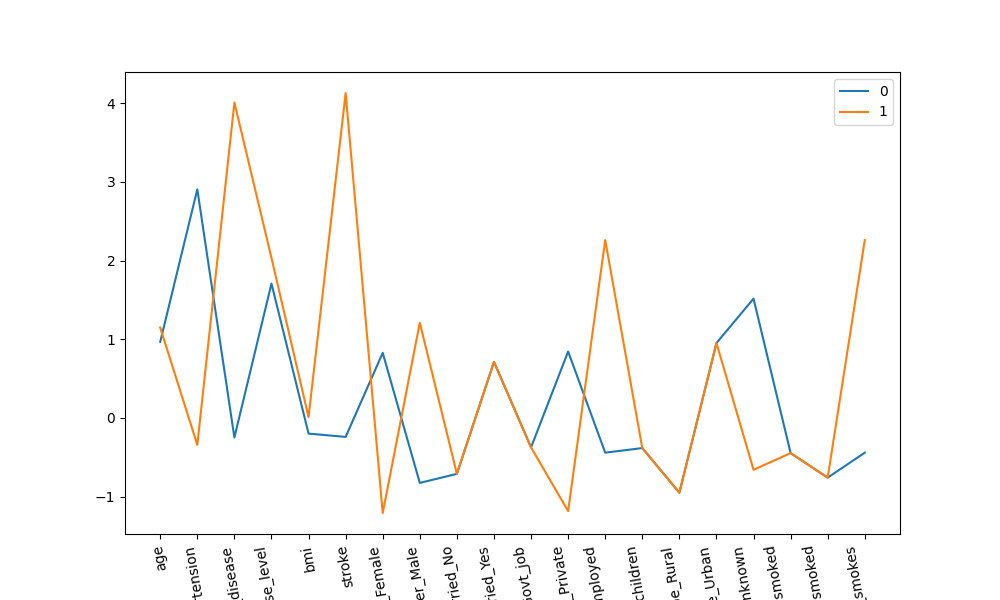

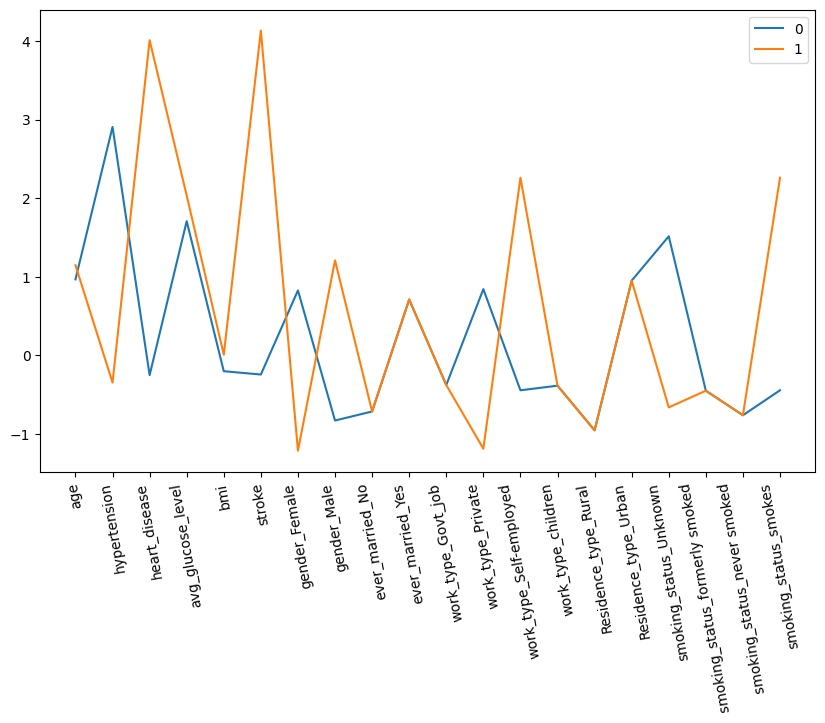

In [ ]:
# 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(predicted_zeros.iloc[0])
plt.plot(predicted_ones.iloc[0])
plt.legend(['0', '1'])
plt.xticks(rotation=100)
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)
# Base64로 인코딩
image_brain2 = base64.b64encode(buffer.getvalue()).decode('utf-8')
image_brain2 = "data:image/png;base64," + image_brain2
print(f"Image Variable: {image_brain2}")
plt.show()

In [ ]:
predicted_zeros = predicted_zeros.mean()
predicted_ones = predicted_ones.mean()

Image Variable: 

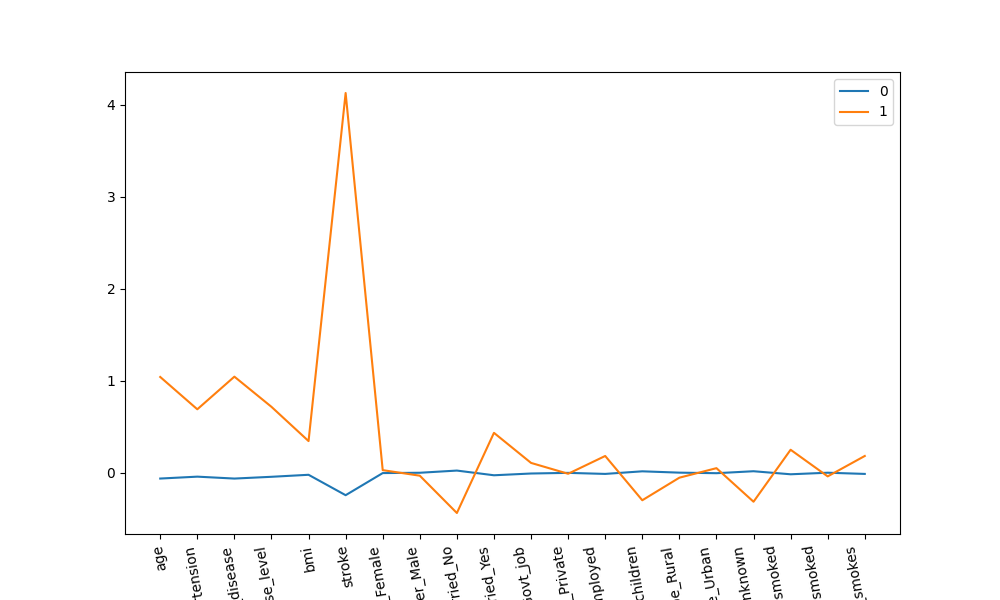

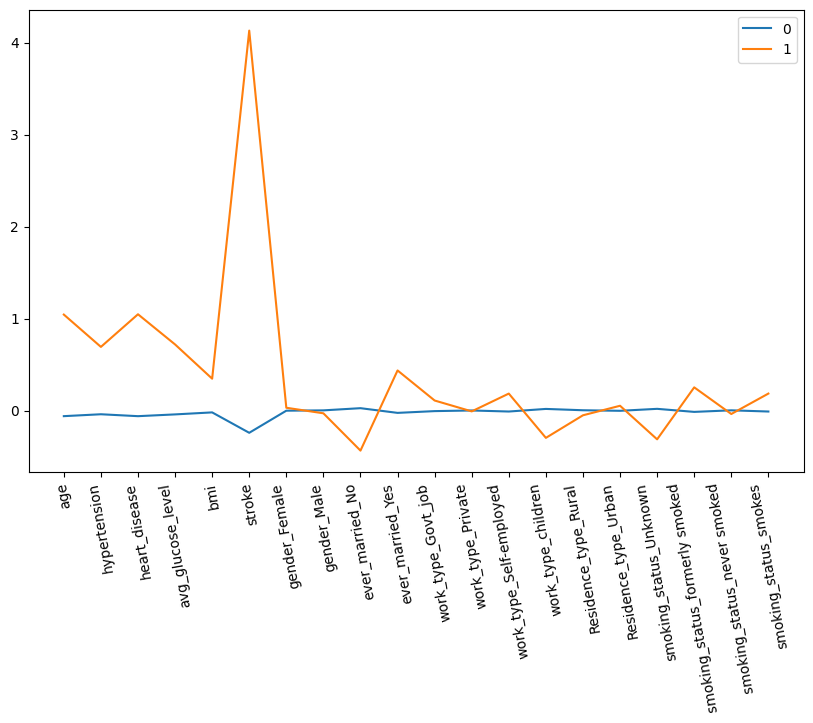

In [ ]:
# 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(predicted_zeros)
plt.plot(predicted_ones)
plt.legend(['0', '1'])
plt.xticks(rotation=100)
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)
# Base64로 인코딩
image_brain3 = base64.b64encode(buffer.getvalue()).decode('utf-8')
image_brain3 = "data:image/png;base64," + image_brain3
print(f"Image Variable: {image_brain3}")
plt.show()

In [ ]:
import mysql.connector
from mysql.connector import errorcode
config = {
  'host':'(your_sql_server_name).mysql.database.azure.com',
  'user':'(your_sql_user)',
  'password':'(your_sql_passwd)',
  'database':'web_db'
}
try:
   conn = mysql.connector.connect(**config)
   print("Connection established")
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with the user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  cursor = conn.cursor()
cursor.execute(f"INSERT INTO brain VALUES(null,'{image_brain1}', '{image_brain2}', '{image_brain3}');")
print("Uploaded", cursor.rowcount, "row(s) of data.")
conn.commit()
cursor.close()
conn.close()
print("Done.")

Connection established
Uploaded 1 row(s) of data.
Done.
